# Univariate Linear Regression

### Implementation using Gradient Descent

<IPython.core.display.Javascript object>


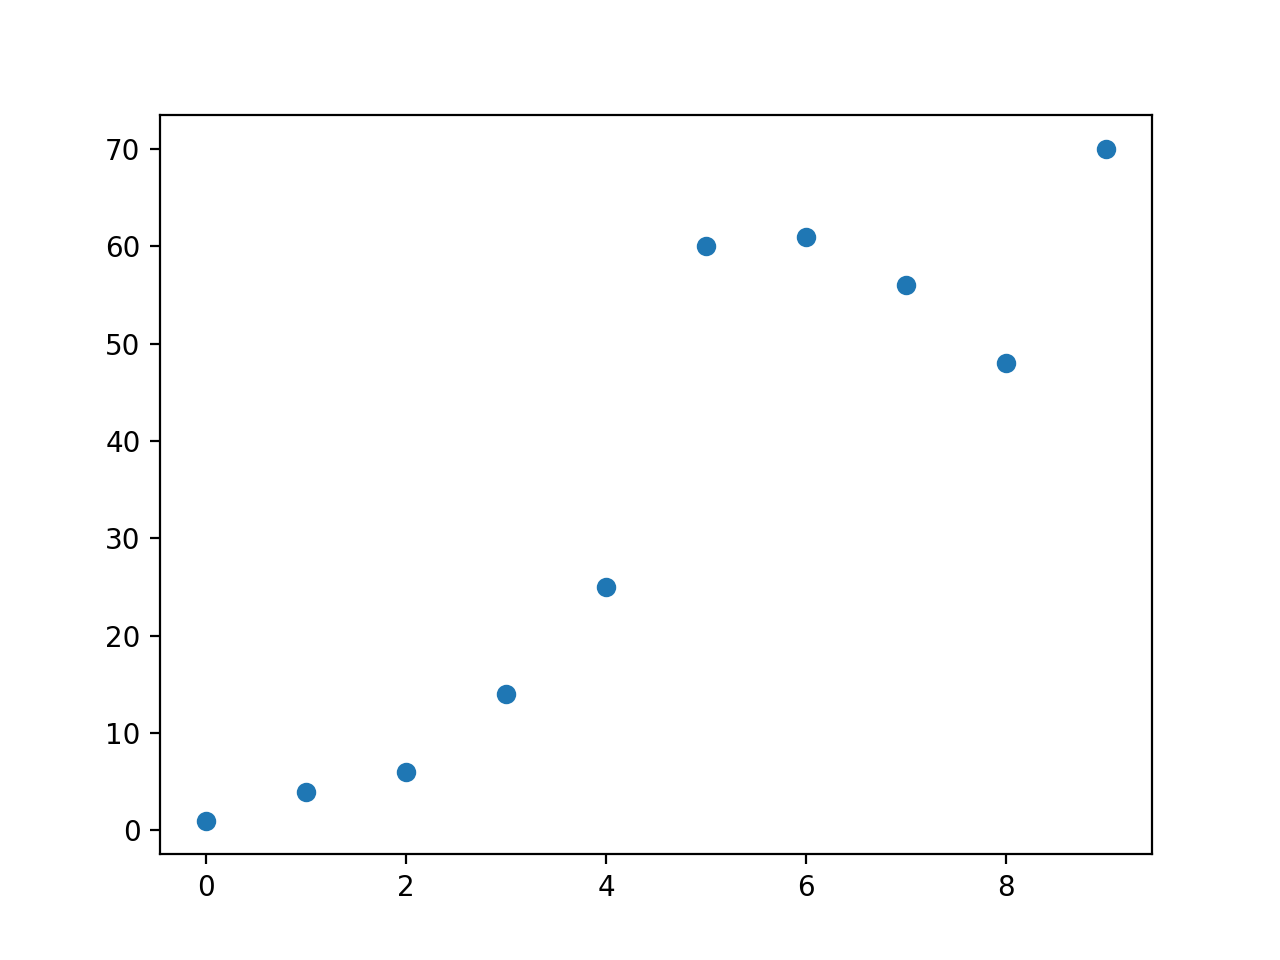

In [3]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# some constants
NORMALIZE_C = 100.0
# the range of values for the points
RANGE = 30
# the number of points plotted
NUM_OF_PTS = 10
# our learning rate
ALPHA = 0.00001

# generate x, y pairs to plot
# this will the be the data we are trying to fit a line to
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 4, 6, 14, 25, 60, 61, 56, 48, 70]

# X = []
# Y = []
# some helper methods for generating
# linear or random data
def gen_line():
    for i in range(0, NUM_OF_PTS):
        X.append(i)
        Y.append(i)
        
def gen_random():
    for i in range(0, NUM_OF_PTS):
        X.append(random.randint(0, RANGE))
        Y.append(random.randint(0, RANGE))

# gen_random()
plt.scatter(X, Y)
plt.show()

## Methods for Regression

I am using a L2 loss function and the gradient to calculate the line of best fit.

In [4]:
# first we define some general purpose methods

# L2 loss function (squared difference)
def L2_Loss(y1, y2):
    """Returns the loss between real y and calculated y values"""
    return pow((y1 - y2), 2)

def f(w, x):
    """Linear function y = mx + b"""
    return w[0] + (w[1] * x)

# sum of losses for a given weight vector, we put each loss in an array
# this is just for plotting
def loss(W):
    # go through all the X, calc y from weights, calc loss
    # we want to minimize loss
    t_loss = 0
    for i in range(0, len(X)):
        y2 = f(W, X[i])
        t_loss += L2_Loss(Y[i], y2)
    return t_loss

### Do the actual regression algorithm

<IPython.core.display.Javascript object>


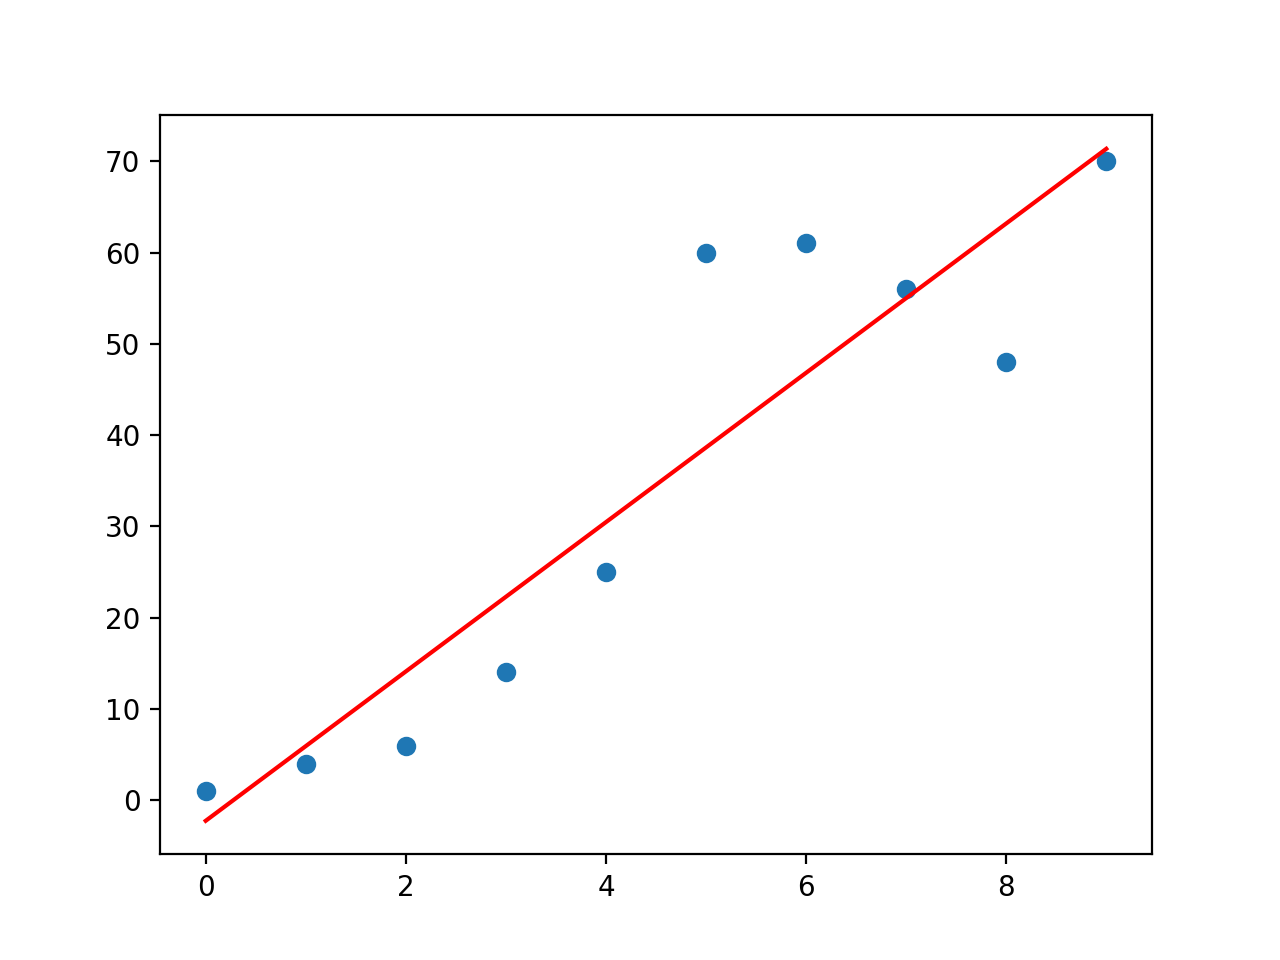

In [8]:
# initialize dummy weights
# weights = np.array([-3, 1])
weights = np.array([0.0, 1.0])

# we know loss is (y1 - y2)^2
# we expand y2 to get: (y1 - (w0 + w1*x))^2    
def get_gradient(W):
    """Returns the gradient vector of the loss function"""
    grad = []
    dW0dX = 0.0
    dW1dX = 0.0
    
    for i in range(NUM_OF_PTS):
        dW0dX += Y[i] - f(W, i)
        dW1dX += (Y[i] - f(W, i)) * i
        
    dW0dX = dW0dX * ALPHA
    dW1dX = dW1dX * ALPHA
    
    grad.append(dW0dX)
    grad.append(dW1dX)
    return grad
    
def update_weights(gradient):
    """Returns void, updates the weights using the gradient"""
    # note that this gradient has already been adjusted with our learning rate
    weights[0] += gradient[0]
    weights[1] += gradient[1]
    
def linear_regression():
    # it is too slow to run until the gradient is 0
    # also I believe my learning rate is to large to raech gradient 0
    for k in range(100000):
        grad = get_gradient(weights)
        update_weights(grad)

# calculate the weights
linear_regression()
new_X = []
new_Y = []
# generate new data points for the line
for i in range(0, NUM_OF_PTS):
    new_X.append(i)
    new_Y.append(f(weights, i))
    i += 1

# plot the line along with the scatter plot
plt.scatter(X, Y)
plt.plot(new_X, new_Y, 'r')

plt.show()

# Linear Classification with Logistic and Perceptron Classifiers

## First set up data

<IPython.core.display.Javascript object>


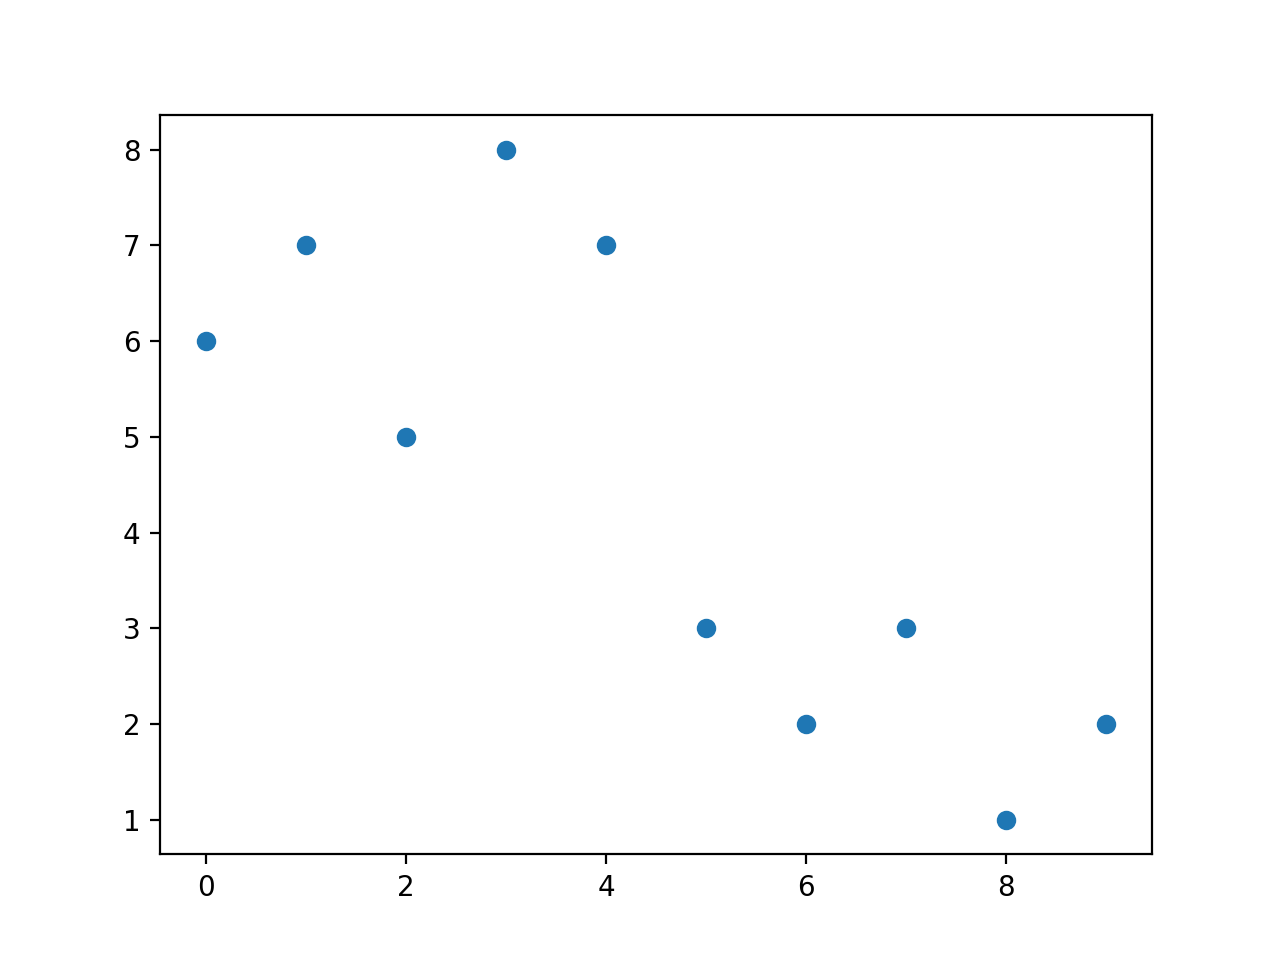

In [11]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x2 = [6, 7, 5, 8, 7, 3, 2, 3, 1, 2]
xs = [x1, x2]
z = [0, 0, 0, 0, 0, 1, 1, 1, 1 ,1]

plt.scatter(XX, YY)
plt.show()

In [3]:
class CustomMath():
    '''Math functions for machine learning'''
    def dot_product(W, X):
        # insert 1 for bias weight
        X.insert(0, 1)
        result = 0
        for i in range(len(W)):
            result += W[i]*X[i]
        return result
    
    def sigmoid(x):
        '''Sigmoid function for classification'''
        return 1 / (1 + pow(math.e, -x))
    
    def perceptron(x):
        '''Perceptron i.e. 1 or 0'''
        if (x >= 0):
            return 1
        return 0

## Linear Classification

In [6]:
# we have three weights, since this is a function of two variables
# x2 = w0 + w1x1

class LinearClassification():
    def __init__(self, X, Y):
        '''Initializes linear classification tool'''
        self.X = X
        self.Y = Y
        
        self.W = np.zeros(len(X) + 1, dtype=np.float32)
    
    def linear_classification(self):
        for i in range(0, 100000):
            for k in range(0, len(self.W)):
                update_W(k)
    
    def update_W(self, index):
        res = CustomMath.perceptron(CustomMath.dot_product(self.W, self.X))
        print(res)
        
classifier = LinearClassification(x1, x2)
        